# **Project Name**    - 



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Author -** BALAJI J


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/balaji-89/ApplianceEnergyPrediction

# **Problem Statement**


My main problem to find the energy usage of appliance based on the features given.The energy(target variable) is measured using real numbers so this problem is the regression problem and this is the EDA notebook so, EDA required to understand about the features of the given problem will be presented in this notebook.


#### **Define Your Business Objective?**

Answer Here: As our problem is predict the appliance energy consumption, we can able to get prepared for the future if we have the temperatures data.If we have the temperatures data and total number of houses estimation helps to predict the total number of electricity required for the particular part country,which might be very useful for the government atleast to take relative measure regarding electricity production.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


### Dataset Loading

In [3]:
# Load Dataset
#TODO : add Description and comments for the entire code
def load_data(path):
    return pd.read_csv(path)

df = load_data('../Dataset/data_application_energy.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.sample(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
13272,2016-04-12 21:00:00,180,0,22.926667,43.500000,21.230000,42.626667,26.326667,43.73,22.790000,...,21.100000,39.530000,10.5,751.300000,72.000000,1.000000,40.000000,5.6,34.691728,34.691728
14850,2016-04-23 20:00:00,120,0,23.000000,37.766667,20.633333,38.096667,23.700000,33.90,22.350000,...,20.633333,33.730000,6.3,758.200000,62.000000,6.000000,40.000000,-0.5,5.356465,5.356465
2416,2016-01-28 11:40:00,40,0,18.890000,46.326667,18.290000,45.863333,19.600000,44.50,18.200000,...,16.890000,46.700000,6.5,765.233333,79.333333,1.333333,36.333333,3.1,38.289361,38.289361
12924,2016-04-10 11:00:00,60,0,21.700000,40.693333,23.633333,36.590000,22.500000,38.50,21.533333,...,20.890000,40.796667,9.6,753.300000,71.000000,3.000000,40.000000,4.6,12.111355,12.111355
7869,2016-03-06 08:30:00,50,0,18.666667,38.060000,16.700000,40.200000,20.290000,38.29,17.390000,...,18.000000,42.000000,2.7,745.800000,94.000000,6.000000,24.000000,1.8,16.401762,16.401762


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print("Total Rows", df.shape[0])
print("Total Columns", df.shape[1])

Total Rows 19735
Total Columns 29


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated(keep = 'first').sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isna().sum().sum()

0

### What did you know about your dataset?

Answer Here: As we our dataset consists of 19735 rows and 29 features. Fortunately we don't have any null values in any of the features. And finally all the features is numerical data except one object(can be converted to datetime) so doing preprocessing is much easier.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


### Variables Description 

Appliances : It is our target variable.
lights : It has mostly zero values and it has some outliers.
All the temperature measures here are measured in Celsius.
T1(Temperature in Kitchen Area) : These temperature looks descent without any outliers and seems like it doesn't have cold climate.
T2(Temperature in Living Room) : These temperature looks descent without any outliers and seems like it doesn't have cold climate.
RH1 to RH2 (Room Humidity): It is the measure of humidity in different rooms in the house.
Windspeed : This Windspeed has some outliers.
From Chievers weather station we have some weather date like Hg RHout, Visibility, Tdewpoint etc.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.

#As we don't have any categorical variable checking unique values in numerical column doesn't make any sense in my opinion as it will end up with long set of values for 
#each variable

#I am checking uniqueness in target variable.

print(df.Appliances.unique())

print("Total number of unique values in  target feature", df.Appliances.nunique())

[  60   50   70  230  580  430  250  100   90   80  140  120  190  110
  400  390  240   40   30  310  380  370   20  260  500  450  220  170
  290  130  200  210  180  350  300  340  150  330  420  520  360  270
  550  690  620  610  490  410  320  740  910  510  790  460  160  480
  280  560 1080  750  470  440  800  540  530  660  630  600   10  570
  830 1070  890  590  850  710  680  670  780  640  650  700  770  720
  760  860  880  730  900  820  870  840]
Total number of unique values in  target feature 92


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.

#changing date column dtype as datetime type
df['date'] = pd.to_datetime(df['date'])
df.date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 19735 entries, 0 to 19734
Series name: date
Non-Null Count  Dtype         
--------------  -----         
19735 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 154.3 KB


In [13]:
#we changed the date features as date datetype
#checking no.of unique dates equal to unique rows of df so that we can make date column as index for dataframe

if df.date.nunique() == df.shape[0]:
    df.set_index('date',inplace=True)



In [14]:
#making all column_name to lower case to make unity.
df.columns = [col.lower() for col in df.columns]

### What all manipulations have you done and insights you found?

We don't much manipulations work in this dataset as this dataset is already perfect for data analysis. I doesn't have nan values to impute. I just changed the datatype of "date" variable to pandas datetime object and made it as identifier/primary key for our dataframe, as all data are unique for each observation.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<AxesSubplot:ylabel='Density'>

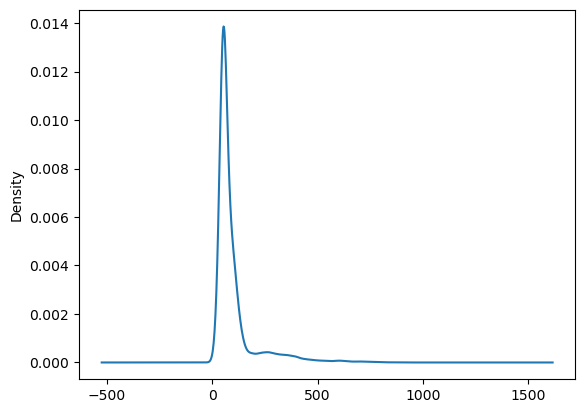

In [15]:
# Chart - 1 visualization code

df.appliances.plot(kind='kde')

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 2

<AxesSubplot:xlabel='date'>

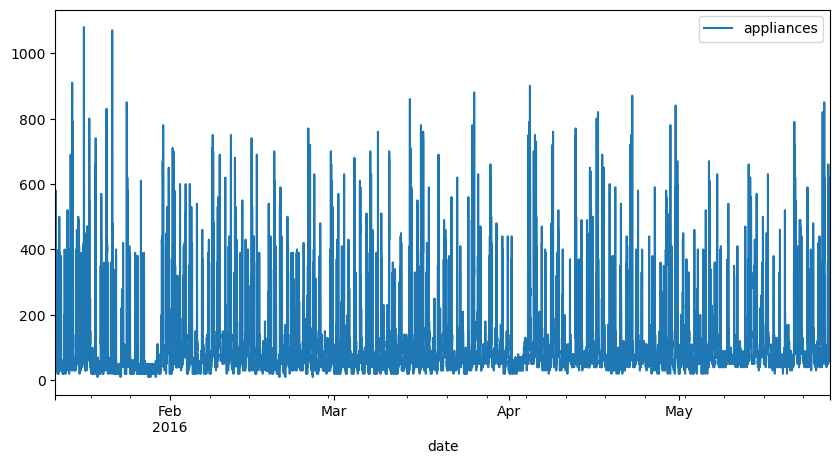

In [36]:
# Chart - 2 visualization code
df[['appliances']].plot(figsize= (10,5))


##### 1. Why did you pick the specific chart?

I chose line plot, because in time series it is easy to witness the trend across time easily.

##### 2. What is/are the insight(s) found from the chart?

I could see the similarity in trend in every 2 months, but could not able to confirm as we have data for only 5 months. As the chart shows it starts from January to may.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, I think this trend which we noticed in the chart may helps us to estimate the future usage of the appliances.

#### Chart - 3


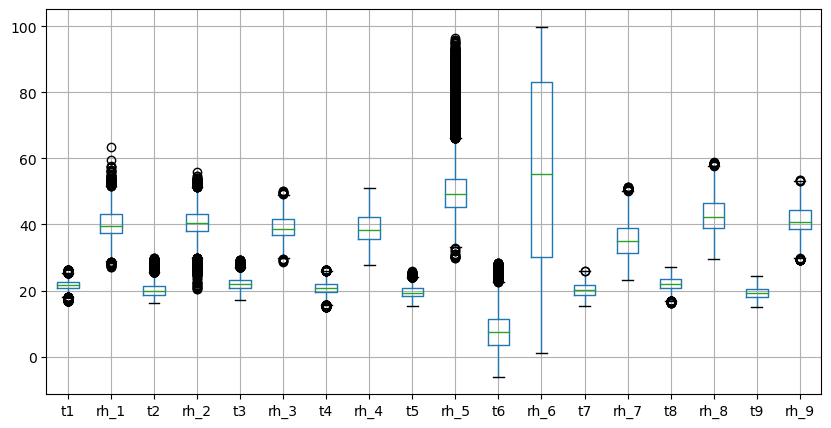

In [37]:
# Chart - 2 visualization code
df.iloc[:,2:20].boxplot(figsize=(10,5))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

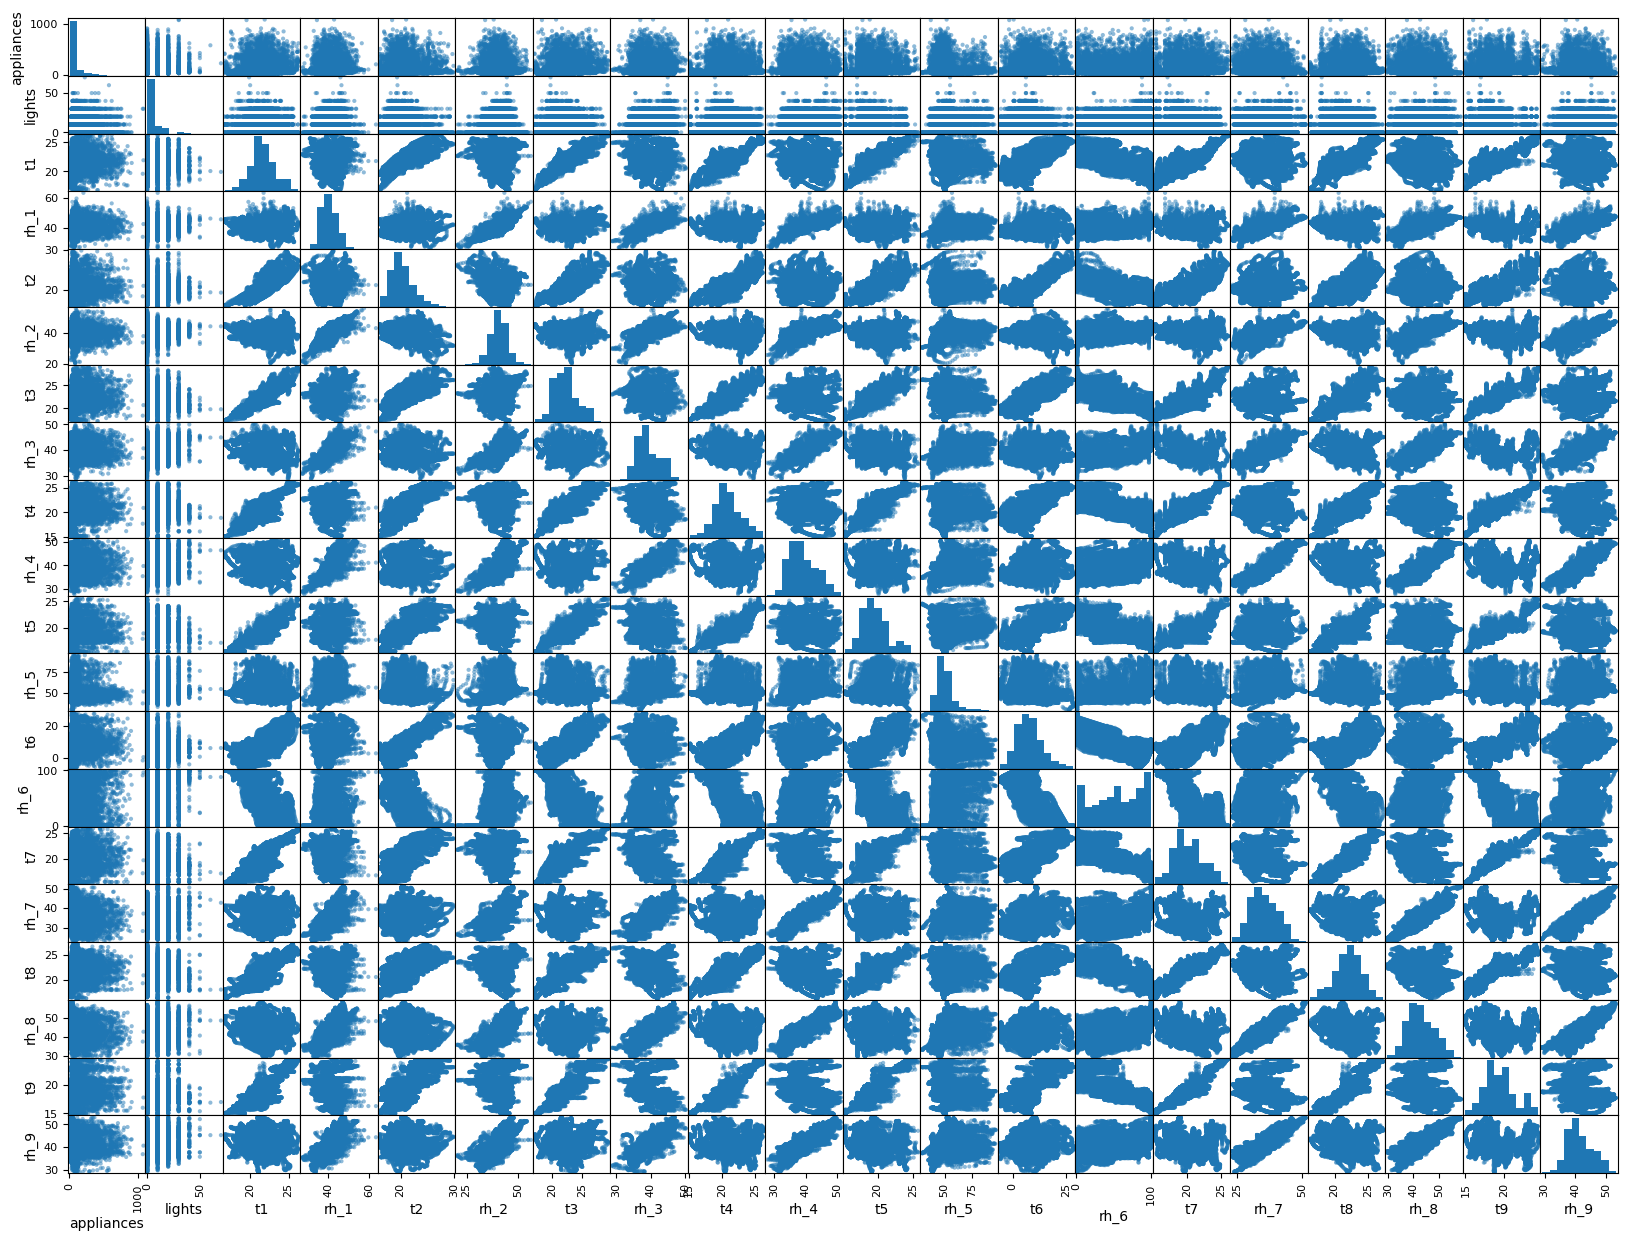

In [39]:
# Chart - 3 visualization code
pd.plotting.scatter_matrix(df.iloc[:,:20],figsize=(20,15))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

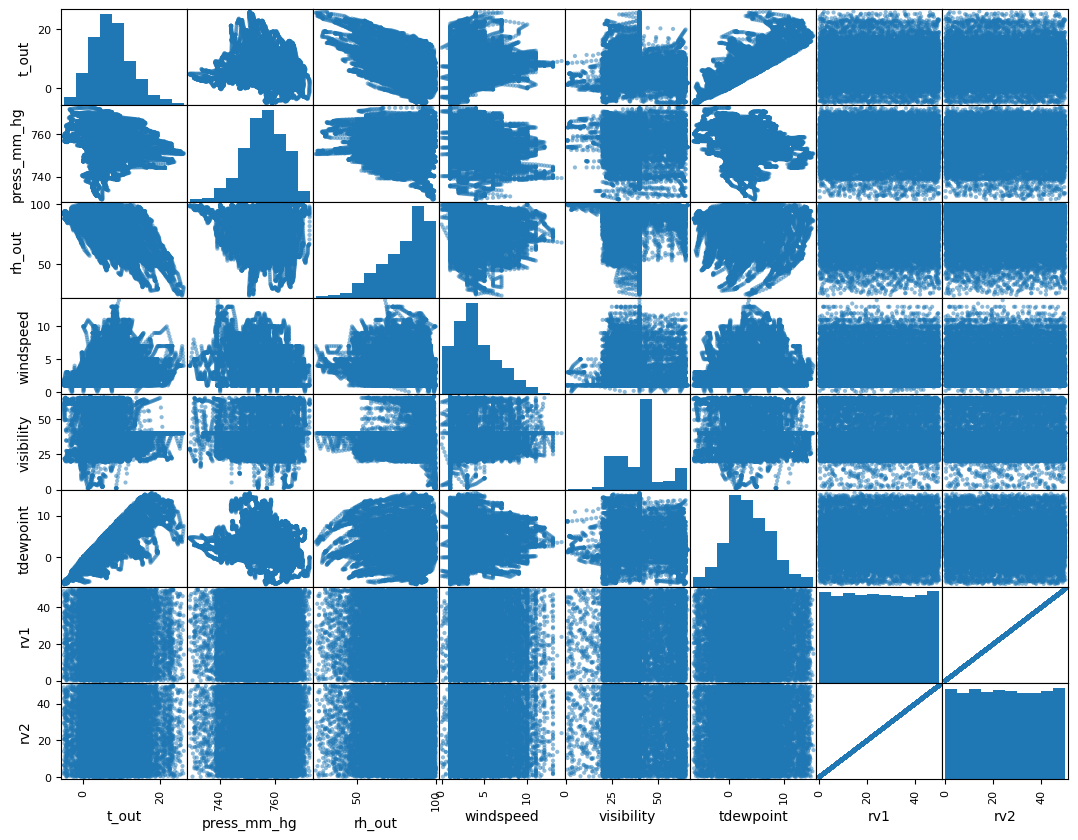

In [40]:
# Chart - 4 visualization code
pd.plotting.scatter_matrix(df.iloc[:,20:],figsize=(13,10))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

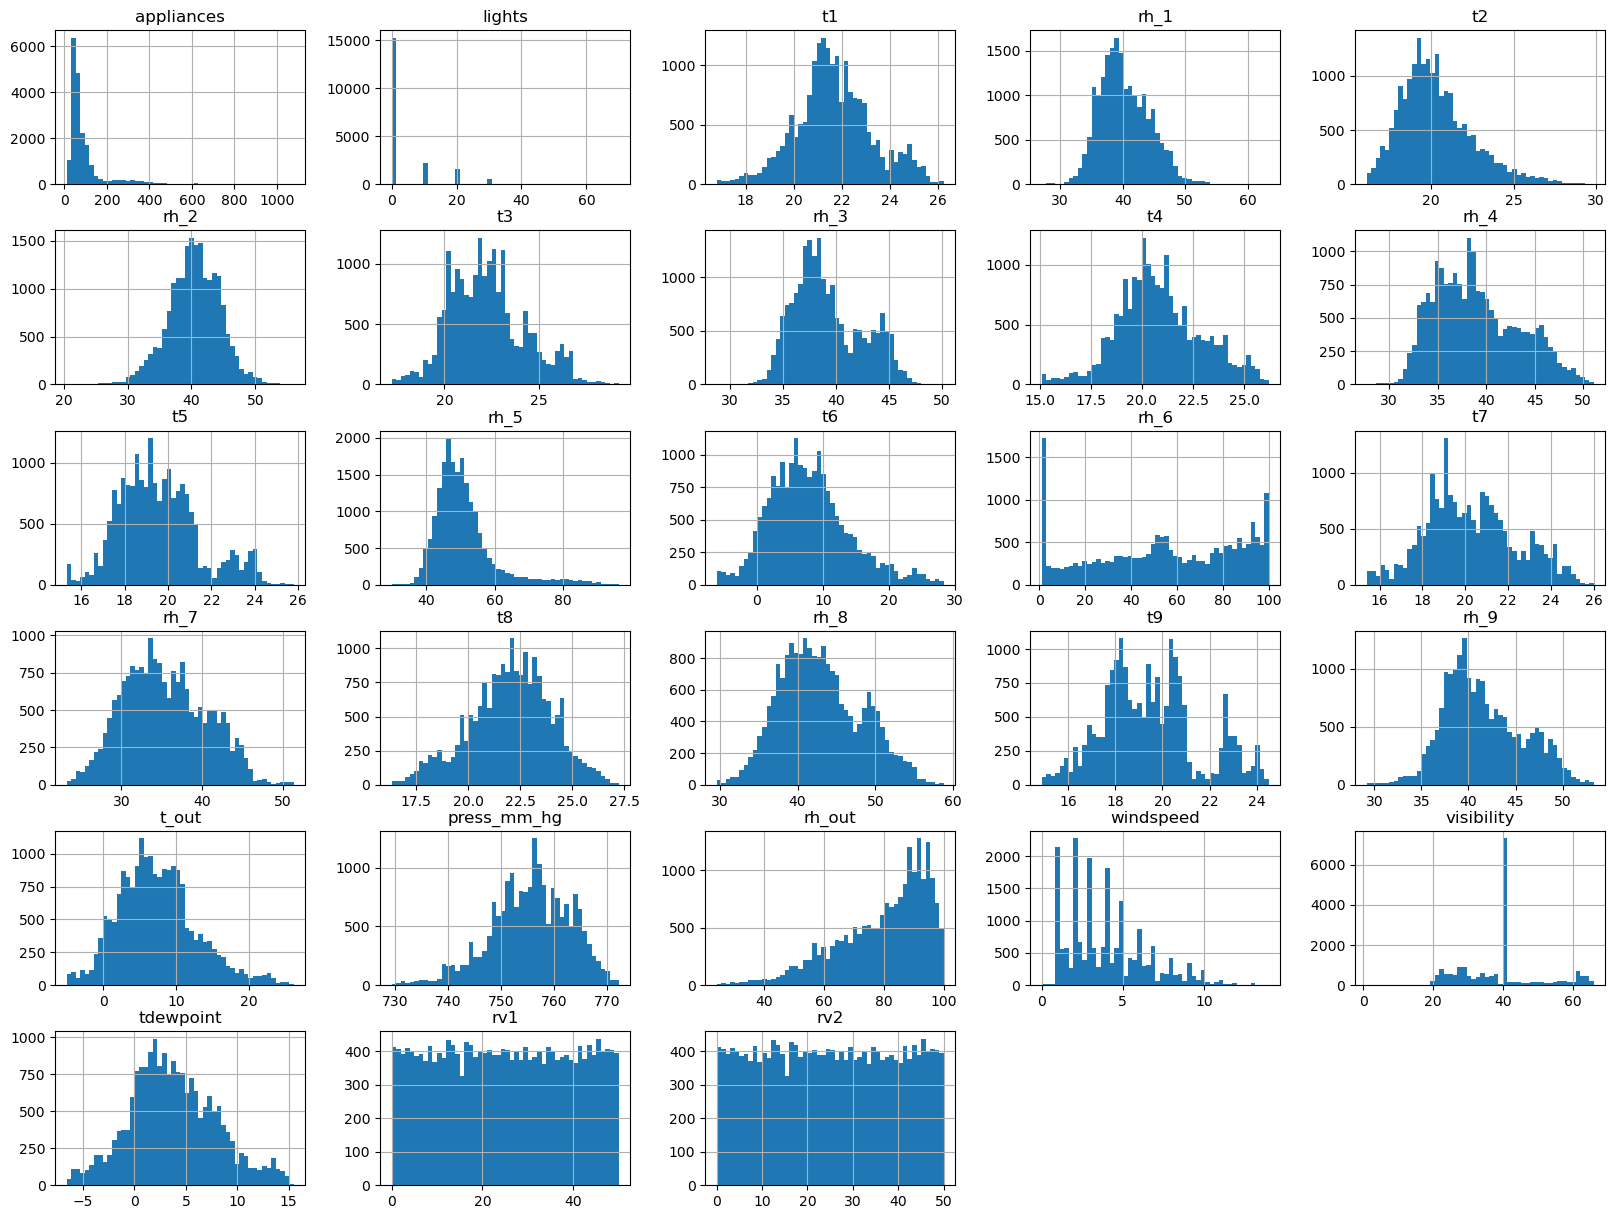

In [46]:
# Chart - 5 visualization code
df.hist(bins=50, figsize=(20,15))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

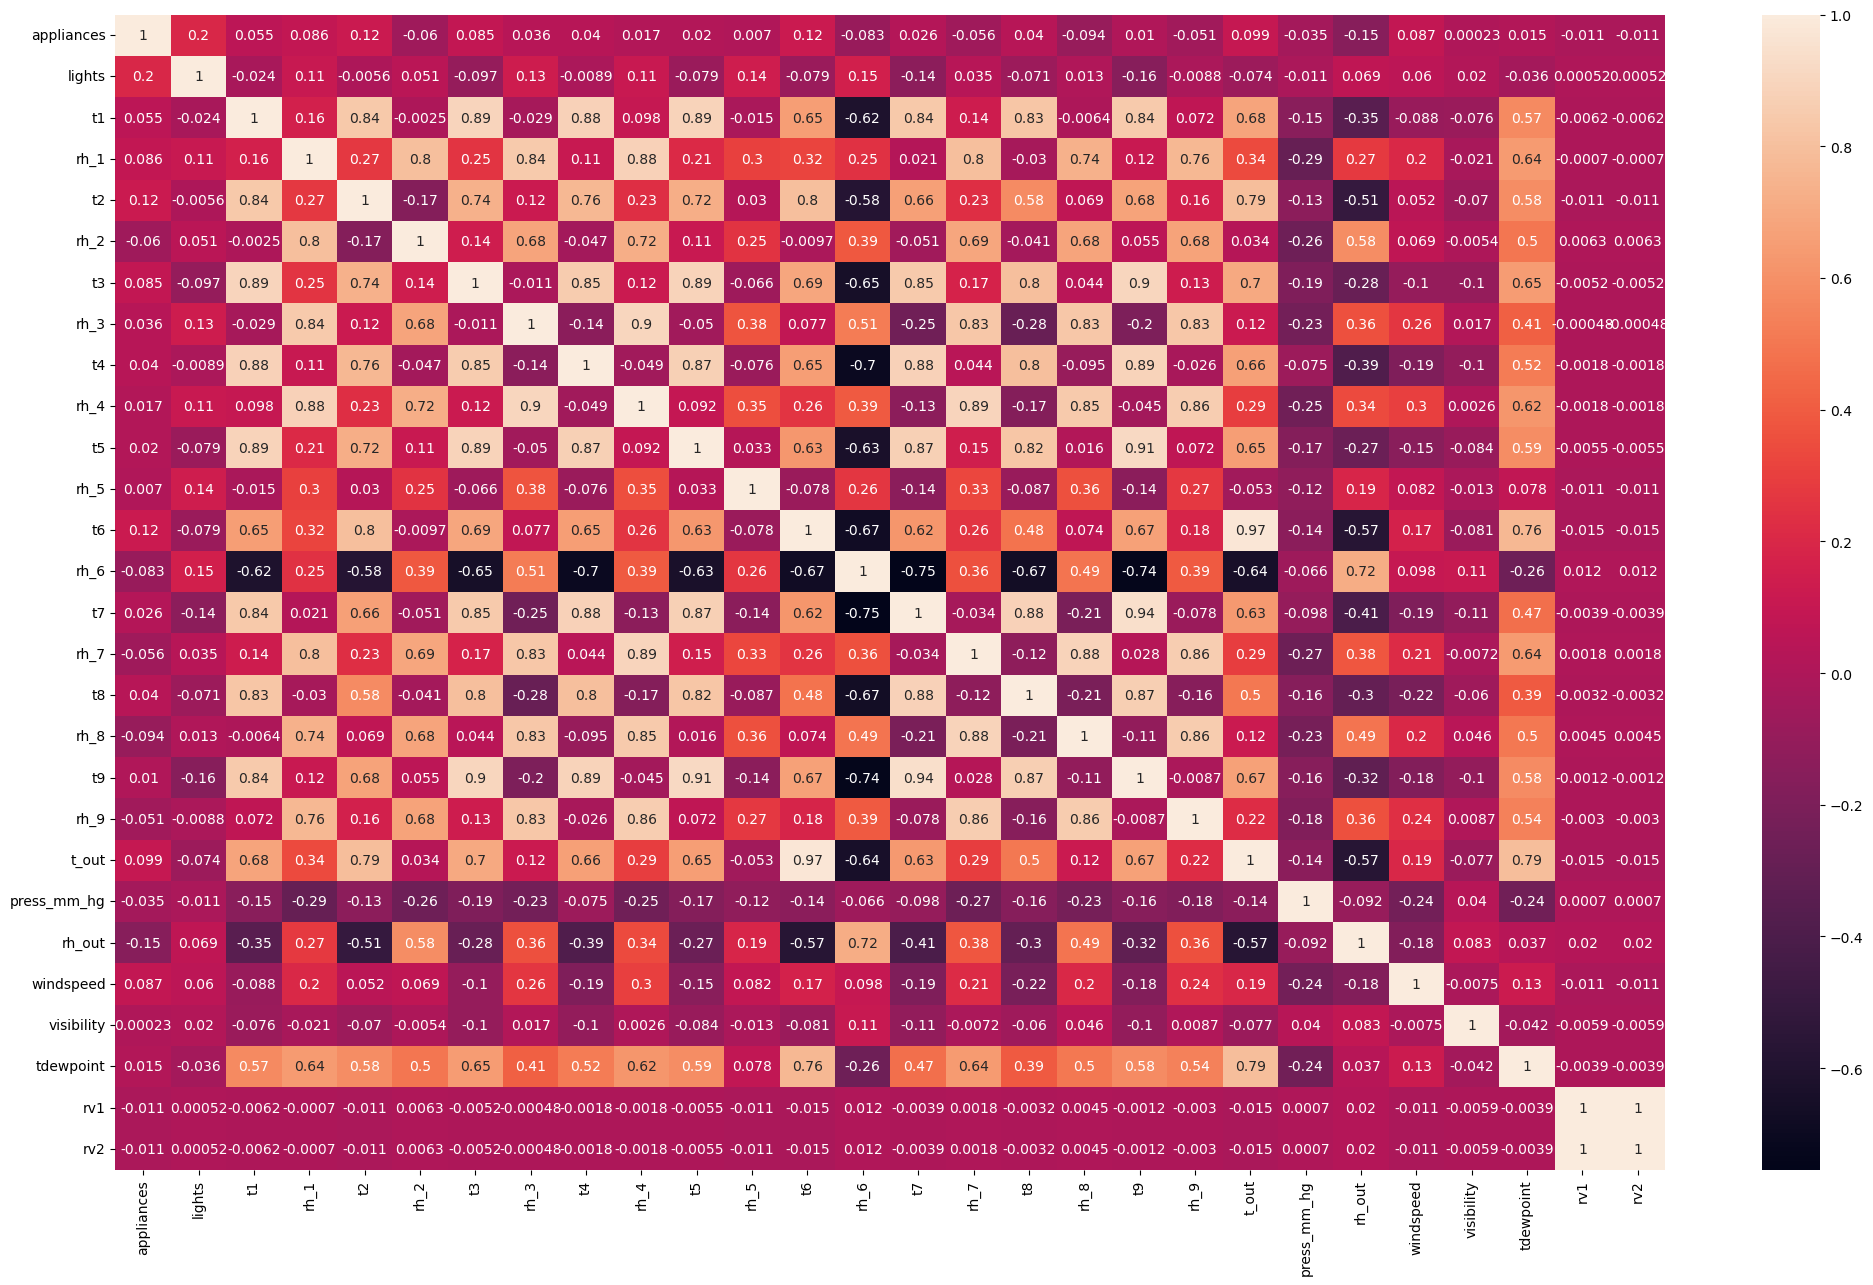

In [48]:
# Chart - 6 visualization code
plt.figure(figsize=(25,15))
dataplot = sns.heatmap(df.corr(),annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [47]:
# Chart - 7 visualization code

#TODO: Month wise appliance distribution

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***